<a href="https://colab.research.google.com/github/BautistaDavid/Proyectos_ClaseML/blob/corte_2/proyecto7_EXPLORATORY_DATA_ANALYSIS_COLOMBIA'S_STUDENTS_TEST_ICFES_2019_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPLORATORY DATA ANALYSIS: COLOMBIA'S STUDENTS TEST ICFES 2019-2**

In [9]:
# !pip install squarify
import pandas as pd 


## **Let's check the data**

The data has 82 columns, however for out analysis we just are going to select a few that are ones of the most important.

In [10]:
data = pd.read_csv('data_icfes_2019_2.csv')
data.drop(columns = ['Unnamed: 0'], inplace = True)
print(f'\nData Shape: {data.shape}\n ')
data.head(2)


Data Shape: (35259, 82)
 


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,...,54.0,67.0,A1,208.0,25.0,50.9421557404314,2.0,2.0,PUBLICAR,NO
1,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,...,63.0,88.0,A2,299.0,83.0,59.767864431576,3.0,4.0,PUBLICAR,NO


In [11]:
data.columns =[i.lower() for i in data.columns]
cols = ['estu_fechanacimiento', 'estu_genero', 'estu_etnia', 'estu_depto_reside','estu_mcpio_reside', 'fami_estratovivienda','cole_genero', 'cole_naturaleza','cole_calendario', 'cole_bilingue','cole_sede_principal', 'cole_area_ubicacion', 'cole_jornada', 'estu_privado_libertad',
            'punt_lectura_critica','percentil_lectura_critica','desemp_lectura_critica','punt_matematicas', 'percentil_matematicas', 'desemp_matematicas','punt_c_naturales', 'percentil_c_naturales', 'desemp_c_naturales', 'punt_sociales_ciudadanas', 'percentil_sociales_ciudadanas',
            'desemp_sociales_ciudadanas', 'punt_ingles', 'percentil_ingles','desemp_ingles', 'punt_global', 'percentil_global']
data = data[cols]

we have already selected the variables that are going use for our analysis. So Now let's apply some fixes to the data.

In [12]:
data['estu_fechanacimiento'] = [fecha[6:10] for fecha in data['estu_fechanacimiento']]
data['estu_fechanacimiento'].replace({'2015':'2000','2016':'2001','0001':'2000','0002':'2000'}, inplace = True)
data['fami_estratovivienda'].replace({'-':'Sin Estrato'}, inplace = True)
data['estu_etnia'].replace({'-':'Ninguno'}, inplace = True)
# data['estu_genero'].replace({'F':0,'M':1}, inplace = True)
data['cole_bilingue'].replace({'-':'N'}, inplace = True)
data.drop(data[data['estu_genero'] == '-'].index, inplace = True)

data['estu_fechanacimiento'] = pd.to_datetime(data['estu_fechanacimiento'])
# We can generate a variable of the age of the student when he did the test
data['edad'] = [2020 - i for i in pd.DatetimeIndex(data['estu_fechanacimiento']).year]
data.drop(columns = ['estu_fechanacimiento'], inplace = True )
# changing the data type of some columns from object to category using a Loop for
vars_category = ['estu_etnia', 'estu_depto_reside', 'estu_mcpio_reside', 'fami_estratovivienda','cole_genero', 'cole_naturaleza',
        'cole_genero', 'cole_naturaleza', 'cole_calendario', 'cole_bilingue','cole_sede_principal', 'cole_area_ubicacion', 
        'cole_jornada', 'estu_privado_libertad', 'desemp_ingles','estu_genero']
        
for var in vars_category:
  data[var] = data[var].astype('category')


## **Missing values¿? ... Duplicates ¿?**

using the method ```info()``` we can check that apparently we don't have missing values. however , now lets use the method ```unique()``` in to the variables to check if maybe there's a problem with some answer 







In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35253 entries, 0 to 35258
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   estu_genero                    35253 non-null  category
 1   estu_etnia                     35252 non-null  category
 2   estu_depto_reside              35223 non-null  category
 3   estu_mcpio_reside              35223 non-null  category
 4   fami_estratovivienda           35249 non-null  category
 5   cole_genero                    35252 non-null  category
 6   cole_naturaleza                35252 non-null  category
 7   cole_calendario                35252 non-null  category
 8   cole_bilingue                  35252 non-null  category
 9   cole_sede_principal            35252 non-null  category
 10  cole_area_ubicacion            35252 non-null  category
 11  cole_jornada                   35252 non-null  category
 12  estu_privado_libertad          3

In [14]:
for col in data.columns:
  print(col)
  print(data[col].unique())
  print('\n ----')

estu_genero
['M', 'F']
Categories (2, object): ['F', 'M']

 ----
estu_etnia
['Ninguno', 'Comunidad afrodescendiente', 'Paez', 'Zenú', 'Otro grupo étnico minoritario', ..., 'Arhuaco', 'Cancuamo', 'Palenquero', 'Tucano', NaN]
Length: 20
Categories (19, object): ['Arhuaco', 'Cancuamo', 'Comunidad afrodescendiente', 'Cubeo', ...,
                          'Sikuani', 'Tucano', 'Wayúu', 'Zenú']

 ----
estu_depto_reside
['MAGDALENA', 'BOGOTÁ', 'BOLIVAR', 'ATLANTICO', 'VALLE', ..., NaN, 'AMAZONAS', 'GUAVIARE', 'GUAINIA', 'EXTRANJERO']
Length: 35
Categories (34, object): ['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLANTICO', ..., 'TOLIMA', 'VALLE',
                          'VAUPES', 'VICHADA']

 ----
estu_mcpio_reside
['SANTA ANA', 'BOGOTÁ D.C.', 'CARTAGENA DE INDIAS', 'SOLEDAD', 'CALI', ..., 'EL GUACAMAYO', 'FLORESTA', 'CHÁMEZA', 'CEPITÁ', 'SUTATENZA']
Length: 996
Categories (995, object): ['ABEJORRAL', 'ABRIAQUÍ', 'ACACÍAS', 'ACANDÍ', ..., 'ÁBREGO', 'ÍQUIRA',
                           'ÚMBITA', '

Reviewing the responses of the variables we found some problems with the variable ```percentil_global``` , one of its responses is a NaN represented by a ```'-'``` and there are also integers and strings with the same value in the series. Something similar happens with the variable ```estu_genero```, there are three possible answers for this variable, 1 refers to men, 0 to women and the symbol ```'-'``` that we do not really understand what it represents

We thought of inputting the missing values ​​in some way, however on the part of the genre it would be a questionable measure to assign a value depending on the behavior of the rest of the characteristics. So it was decided to eliminate these records, taking into account that they represented a small percentage of the total sample.

In [15]:
import numpy as np 
rows_drop = len(data[data['percentil_global'] == '-']) + len(data[data['estu_genero'] == '-'])
data.drop(data[data['percentil_global'] == np.NaN].index, inplace = True)
data.drop(data[data['percentil_global'] == '-'].index, inplace = True)
# data.drop(data[data['estu_genero'] == '-'].index, inplace = True)
data.reset_index(drop = True, inplace = True)
# data['estu_genero'] = [int(i) for i in data['estu_genero']]
print(f'Percentage of rows dropped: {round(rows_drop/len(data) *100, 4)}%')

Percentage of rows dropped: 0.0%


In [17]:
# data['percentil_global'] = [int(i) for i in data['percentil_global']]
data['percentil_global'].unique()


array([ 25.,  83.,  84.,  88.,  78.,  19.,  99.,  89.,  95.,  13.,   5.,
        85.,  74.,  33.,  67.,  91.,  64.,  43.,  46.,  80.,  49.,  63.,
         6.,  98.,  72.,  45.,  20.,  27.,  57.,  59.,  60.,  65.,   2.,
        75.,   9.,  86.,  92.,  55.,  81.,  38.,  76.,  28.,  41.,  22.,
        97.,  51.,  61.,  94.,  90.,  96.,  15.,  21.,  62.,  39.,  87.,
        18.,  79.,  31.,  42.,  82.,   7.,   3.,  71.,  35.,  37.,  17.,
        26.,  12.,  16.,  93.,  24.,  73.,  48.,  30.,  58.,  50.,  56.,
        77.,  11.,  40.,  66.,  36.,  52.,  10.,  47.,   1.,   4.,  53.,
         8.,  29.,  14.,  34.,  70., 100.,  54.,  32.,  68.,  23.,  44.,
        69.,  nan])

In [18]:
data['estu_depto_reside'].value_counts()
data['region'] = data['estu_depto_reside'].replace({'BOGOTÁ':'Region Andina','ANTIOQUIA':'Region Andina','VALLE':'Region Pacifica',
                                                    'CUNDINAMARCA':'Region Andina','ATLANTICO':'Region Caribe','SANTANDER':'Region Andina',
                                                    'BOLIVAR':'Region Caribe','CORDOBA':'Region Caribe','NARIÑO':'Region Pacifica',
                                                    'BOYACA':'Region Andina', 'MAGDALENA':'Region Caribe', 'TOLIMA':'Region Andina',
                                                    'NORTE SANTANDER':'Region Andina','HUILA':'Region Andina','CAUCA':'Region Pacifica',
                                                    'CESAR':'Region Caribe','META':'Region Orinoquia','SUCRE':'Region Caribe',
                                                    'RISARALDA':'Region Andina','CALDAS':'Region Andina','LA GUAJIRA':'Region Caribe',
                                                    'QUINDIO':'Region Andina','CASANARE':'Region Orinoquia','CHOCO':'Region Pacifica',
                                                    'CAQUETA':'Region Amazonica','PUTUMAYO':'Region Amazonica','ARAUCA':'Region Orinoquia',
                                                    'GUAVIARE':'Region Orinoquia','AMAZONAS':'Region Amazonica','SAN ANDRES':'Region Caribe',
                                                    'VICHADA':'Region Orinoquia','VAUPES':'Region Amazonica','GUAINIA':'Region Amazonica'})

data['region'] = data['region'].astype('category')


## **Description and graphical analysis of the categorical variables**

In [19]:
data.select_dtypes('category').describe()

,estu_genero,estu_etnia,estu_depto_reside,estu_mcpio_reside,fami_estratovivienda,cole_genero,cole_naturaleza,cole_calendario,cole_bilingue,cole_sede_principal,cole_area_ubicacion,cole_jornada,estu_privado_libertad,desemp_ingles,region
count,35253,35252,35223,35223,35249,35252,35252,35252,35252,35252,35252,35252,35252,35252,35223
unique,2,19,34,995,7,3,2,3,2,2,2,6,2,5,6
top,M,Ninguno,BOGOTÁ,BOGOTÁ D.C.,Estrato 2,MIXTO,OFICIAL,A,N,S,URBANO,MAÑANA,N,A-,Region Andina
freq,18374,33038,5348,5348,11835,34028,26430,34953,34915,33906,29806,16488,35240,16723,18937


Next there are information about the percentage of participation by category in all the categorical variables.

In [20]:
for i in data.select_dtypes('category').columns:
  print('Percentage of participation by category\n ')
  print((data[i].value_counts()*100) / len(data))
  print('-----'*10+'\n')


Percentage of participation by category
 
M    52.120387
F    47.879613
Name: estu_genero, dtype: float64
--------------------------------------------------

Percentage of participation by category
 
Ninguno                          93.716847
Comunidad afrodescendiente        3.191218
Wayúu                             0.700650
Zenú                              0.680793
Otro grupo étnico minoritario     0.601367
Pasto                             0.286500
Paez                              0.209911
Emberá                            0.207075
Pijao                             0.104956
Raizal                            0.070916
Sikuani                           0.053896
Cancuamo                          0.045386
Inga                              0.042550
Guambiano                         0.034040
Huitoto                           0.014183
Cubeo                             0.014183
Arhuaco                           0.014183
Palenquero                        0.005673
Tucano                    

We can generate different pivot tables using categorical variables to look at the frequency of different types of groups in the data. We can also use heatmpas to visualize those frequencies in an easy way

In [21]:
pivot1 = pd.pivot_table(data = data,index =['region'], values = 'punt_global' ,columns =['fami_estratovivienda'],aggfunc = 'count')
pivot1 

fami_estratovivienda,Estrato 1,Estrato 2,Estrato 3,Estrato 4,Estrato 5,Estrato 6,Sin Estrato
region,,,,,,,
EXTRANJERO,0,3,1,1,0,0,3
Region Amazonica,269,121,53,16,7,3,98
Region Andina,3657,7354,5016,1221,374,124,1191
Region Caribe,4020,2686,1415,459,161,83,1380
Region Orinoquia,420,401,209,40,16,8,107
Region Pacifica,1575,1266,695,159,47,19,545


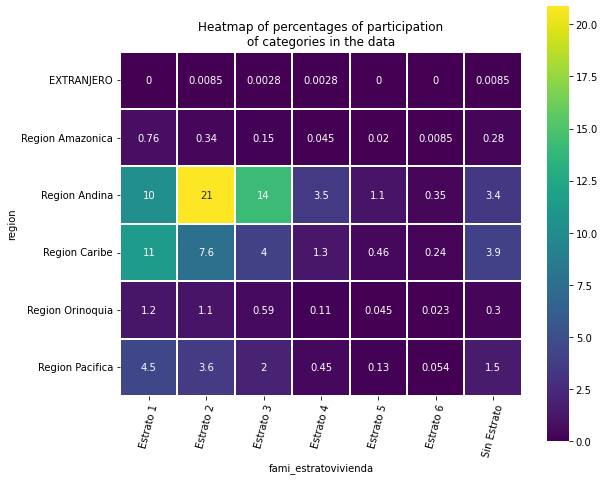

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(9,8))
# graphics_style()
plt.title('Heatmap of percentages of participation\nof categories in the data')
plt.xticks(rotation = 75)
pivot1_heat = sns.heatmap((pivot1 *100)/len(data), cmap="viridis",linewidth=1, linecolor='w', square=True, annot = True,
                          annot_kws={"size":10})

In [26]:
pivot2 = pd.pivot_table(data = data,index =['region'], values = 'punt_global' ,columns =['estu_genero'],aggfunc = 'count')
pivot2 

estu_genero,F,M
region,,
EXTRANJERO,4,4
Region Amazonica,291,276
Region Andina,8872,10065
Region Caribe,5034,5170
Region Orinoquia,548,653
Region Pacifica,2119,2187


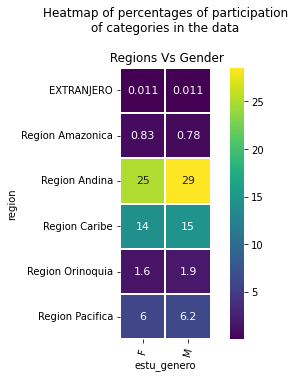

In [28]:
plt.figure(figsize=(7,5))
# graphics_style()
plt.title('Heatmap of percentages of participation\nof categories in the data\n\n Regions Vs Gender')
plt.xticks(rotation = 75)
pivot2_heat = sns.heatmap((pivot2 *100)/len(data), cmap="viridis",linewidth=1, linecolor='w', square=True, annot= True,annot_kws={"size":11} )

In [29]:
pivot3 = pd.pivot_table(data = data,index =['region'], values = 'punt_global' ,columns =['cole_area_ubicacion'],aggfunc = 'count')
pivot3 

cole_area_ubicacion,RURAL,URBANO
region,,
EXTRANJERO,0,8
Region Amazonica,134,433
Region Andina,2351,16586
Region Caribe,1816,8388
Region Orinoquia,207,994
Region Pacifica,929,3377


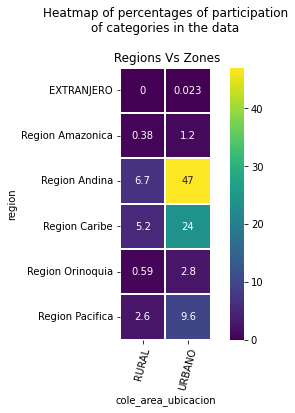

In [31]:
plt.figure(figsize=(7,5))
# graphics_style()
plt.title('Heatmap of percentages of participation\nof categories in the data\n\n Regions Vs Zones')
plt.xticks(rotation = 75)
pivot3_heat = sns.heatmap((pivot3 *100)/len(data), cmap="viridis",linewidth=1, linecolor='w', square=True, annot= True, annot_kws={"size":10} )

In [32]:
pivot4 = pd.pivot_table(data = data,index =['region'], values = 'punt_global' ,columns =['cole_jornada'],aggfunc = 'count')
pivot4 

cole_jornada,COMPLETA,MAÑANA,NOCHE,SABATINA,TARDE,UNICA
region,,,,,,
EXTRANJERO,0,0,8,0,0,0
Region Amazonica,19,366,24,99,13,46
Region Andina,5002,7110,1071,1508,1928,2318
Region Caribe,765,5394,792,283,1332,1638
Region Orinoquia,98,732,59,155,84,73
Region Pacifica,187,2877,215,237,470,320


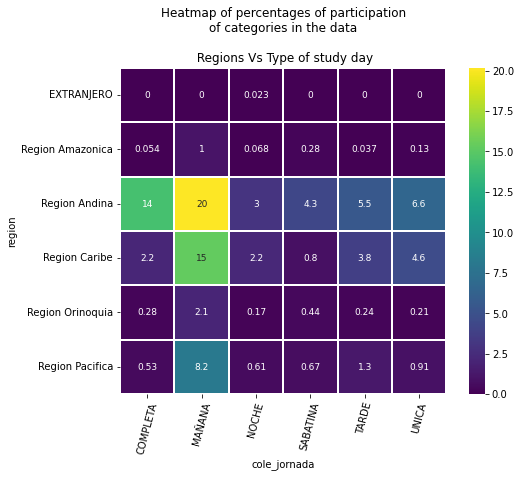

In [33]:
plt.figure(figsize=(8,6))
# graphics_style()
plt.title('Heatmap of percentages of participation\nof categories in the data\n\n Regions Vs Type of study day')
plt.xticks(rotation = 75)
pivot4_heat = sns.heatmap((pivot4 *100)/len(data), cmap="viridis",linewidth=1, linecolor='w', square=True, annot= True ,annot_kws={"size":9})

In [34]:
pivot5 = pd.pivot_table(data = data,index =['region'], values = 'punt_global' ,columns =['estu_etnia'],aggfunc = 'count')
pivot5

estu_etnia,Arhuaco,Cancuamo,Comunidad afrodescendiente,Cubeo,Emberá,Guambiano,Huitoto,Inga,Ninguno,Otro grupo étnico minoritario,Paez,Palenquero,Pasto,Pijao,Raizal,Sikuani,Tucano,Wayúu,Zenú
region,,,,,,,,,,,,,,,,,,,
EXTRANJERO,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0
Region Amazonica,0,0,12,4,0,0,5,10,485,47,0,0,3,0,0,0,1,0,0
Region Andina,0,0,100,1,38,0,0,1,18731,17,5,0,0,37,0,0,0,1,6
Region Caribe,5,16,468,0,0,0,0,0,9163,50,0,2,0,0,21,0,0,245,234
Region Orinoquia,0,0,9,0,0,0,0,0,1161,11,0,0,0,0,1,19,0,0,0
Region Pacifica,0,0,536,0,35,12,0,4,3461,87,69,0,98,0,3,0,0,1,0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text major ticklabel objects>)

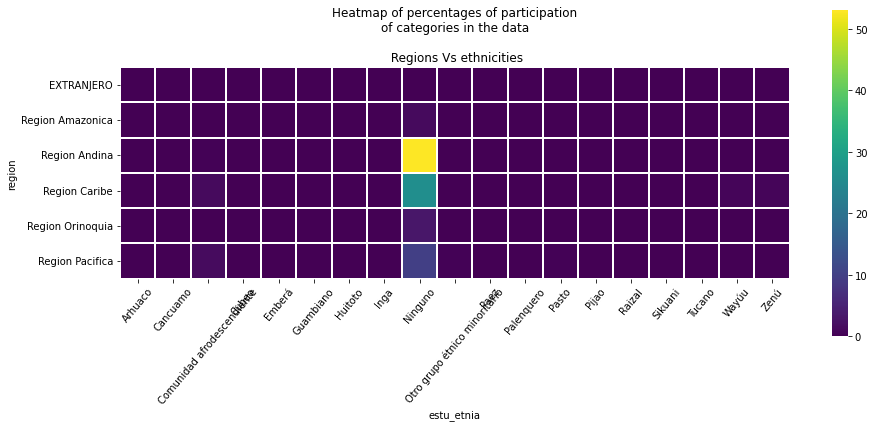

In [35]:
plt.figure(figsize=(15,6))
# graphics_style()
plt.title('Heatmap of percentages of participation\nof categories in the data\n\n Regions Vs ethnicities')
pivot4_heat = sns.heatmap((pivot5 *100)/len(data), cmap="viridis",linewidth=1, linecolor='w', square=True)
plt.xticks(rotation = 50)

## **Analyzing distributions in conjunction with categorical characteristics**

In [138]:
numeric_data = data.select_dtypes(exclude = 'category')
numeric_data.describe()

,punt_lectura_critica,percentil_lectura_critica,desemp_lectura_critica,punt_matematicas,percentil_matematicas,desemp_matematicas,punt_c_naturales,percentil_c_naturales,desemp_c_naturales,punt_sociales_ciudadanas,percentil_sociales_ciudadanas,desemp_sociales_ciudadanas,punt_ingles,percentil_ingles,punt_global,percentil_global,edad
count,35252.000000,35252.000000,35252.000000,35252.000000,35252.000000,35252.000000,35252.000000,35252.000000,35252.000000,35252.000000,35252.000000,35252.000000,35252.000000,35252.000000,35252.00000,35252.000000,35253.000000
mean,52.599087,51.332804,2.642573,51.294763,51.718427,2.478895,48.855129,51.700329,2.064961,46.817968,51.449875,1.942131,49.184472,51.742993,249.18677,51.557585,19.173886
std,10.752152,29.332593,0.770554,12.285762,29.316683,0.764472,11.038333,29.351931,0.777934,12.485522,29.403908,0.841735,12.977603,29.379400,52.91663,29.458209,6.785441
min,0.000000,1.000000,1.000000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,44.00000,1.000000,1.000000
25%,45.000000,26.000000,2.000000,43.000000,26.000000,2.000000,41.000000,26.000000,2.000000,37.000000,26.000000,1.000000,39.000000,26.000000,209.00000,26.000000,18.000000
50%,53.000000,52.000000,3.000000,51.000000,52.000000,3.000000,48.000000,52.000000,2.000000,46.000000,52.000000,2.000000,48.000000,52.000000,246.00000,52.000000,18.000000
75%,60.000000,77.000000,3.000000,60.000000,77.000000,3.000000,57.000000,78.000000,3.000000,56.000000,78.000000,3.000000,57.000000,78.000000,287.00000,78.000000,19.000000
max,100.000000,100.000000,4.000000,100.000000,100.000000,4.000000,100.000000,100.000000,4.000000,100.000000,100.000000,4.000000,100.000000,100.000000,473.00000,100.000000,120.000000


We are going to develop different diagrams, tables and graphs that allow the reader to understand the behavior of variables and their distributions subject to different characteristics.

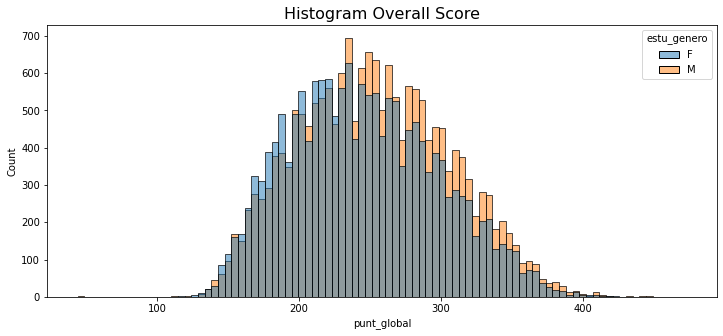

In [149]:
scores = data[['punt_lectura_critica', 'punt_matematicas', 'punt_c_naturales', 'punt_sociales_ciudadanas','punt_ingles']]
plt.figure(figsize=(12,5))
plt.title('Histogram Overall Score', fontsize = 16)
# graphics_style()
score1 = sns.histplot(data = data, x='punt_global', hue = 'estu_genero')

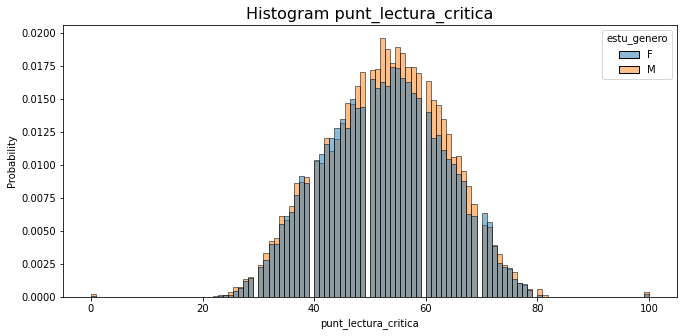

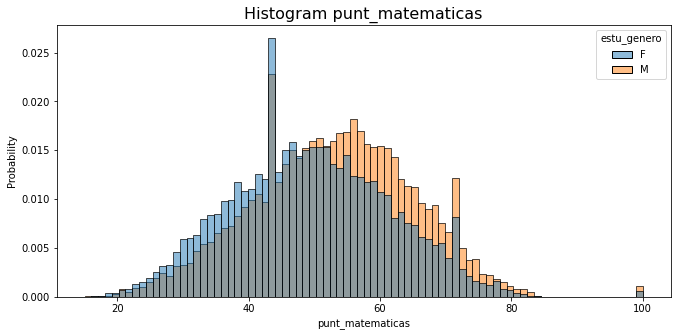

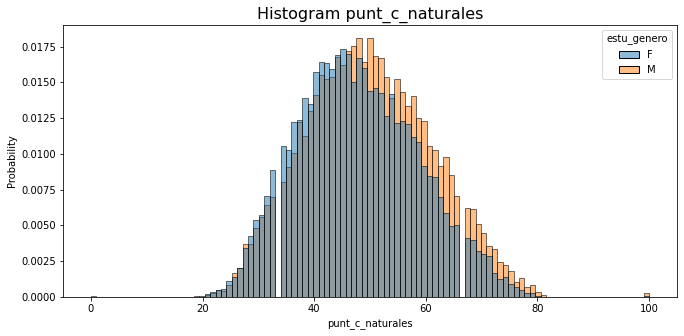

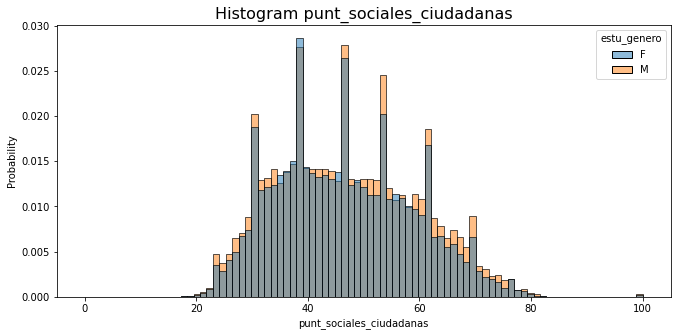

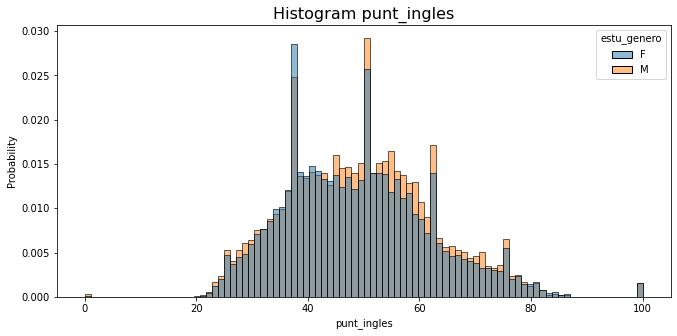

In [148]:
for i in scores.columns:
  plt.figure(figsize = (11,5))
  plt.title(f'Histogram {i}', fontsize = 16)
  sns.histplot(data = data, x = i, hue = 'estu_genero', stat = 'probability')
  plt.show()

### **OVERALL SCORE**

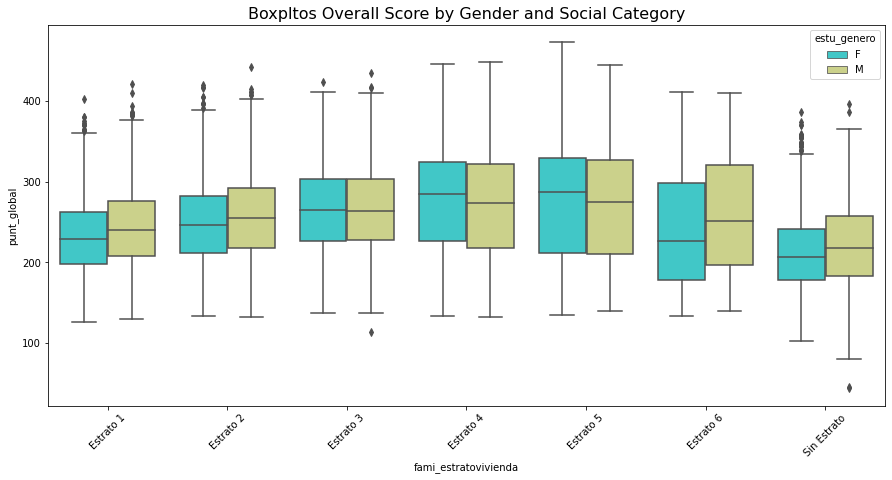

In [39]:
import seaborn as sns 
plt.figure(figsize=(15,7))
# graphics_style()
plt.xticks(rotation = 45)
plt.title("Boxpltos Overall Score by Gender and Social Category", fontsize = 16)
box1 = sns.boxplot(x='fami_estratovivienda',y="punt_global", data=data, hue='estu_genero', palette='rainbow')

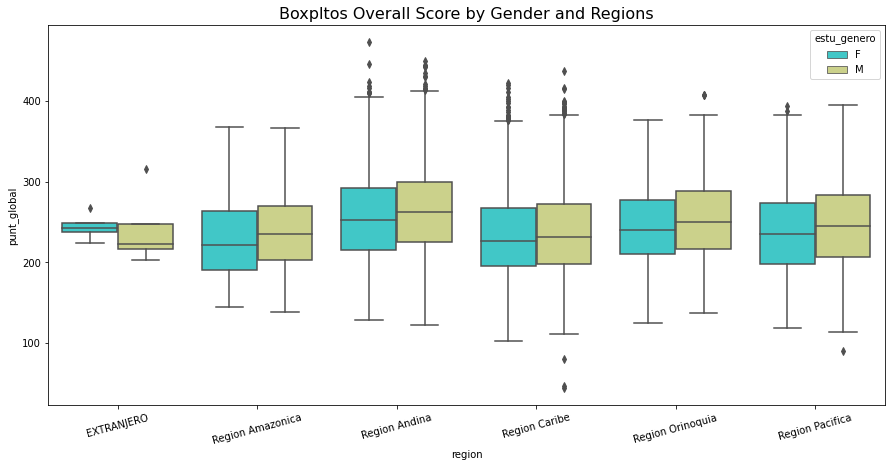

In [40]:
plt.figure(figsize=(15,7))
plt.xticks(rotation = 15)
plt.title("Boxpltos Overall Score by Gender and Regions", fontsize = 16)
box2 = sns.boxplot(x='region',y="punt_global", data=data, hue='estu_genero', palette='rainbow')

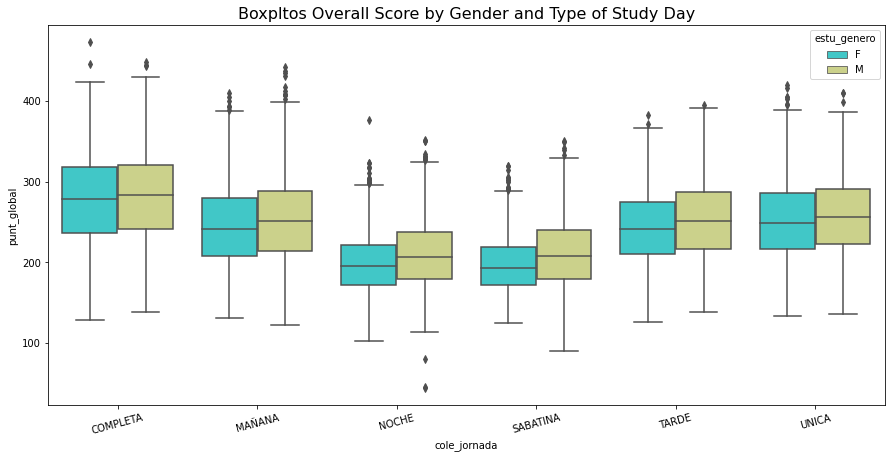

In [41]:
plt.figure(figsize=(15,7))
plt.xticks(rotation = 15)
plt.title("Boxpltos Overall Score by Gender and Type of Study Day", fontsize = 16)
box2 = sns.boxplot(x='cole_jornada',y="punt_global", data=data, hue='estu_genero', palette='rainbow') 

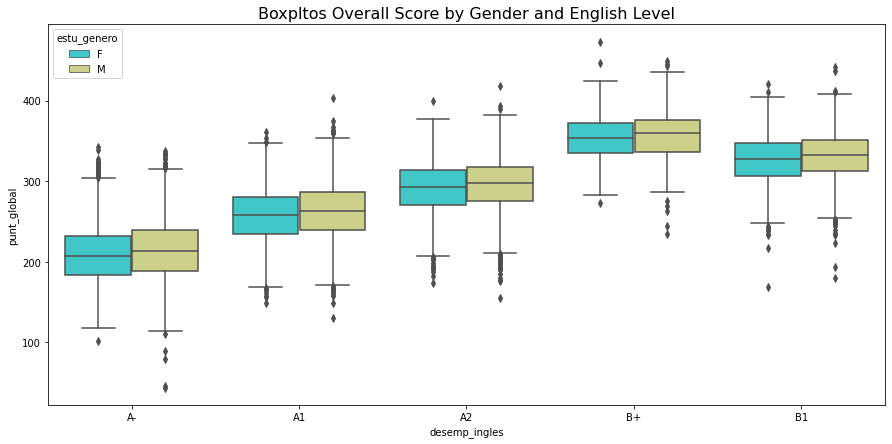

In [47]:
plt.figure(figsize=(15,7))
plt.xticks(rotation = 0)
plt.title("Boxpltos Overall Score by Gender and English Level", fontsize = 16)
box2 = sns.boxplot(x='desemp_ingles',y="punt_global", data=data, hue='estu_genero', palette='rainbow') 

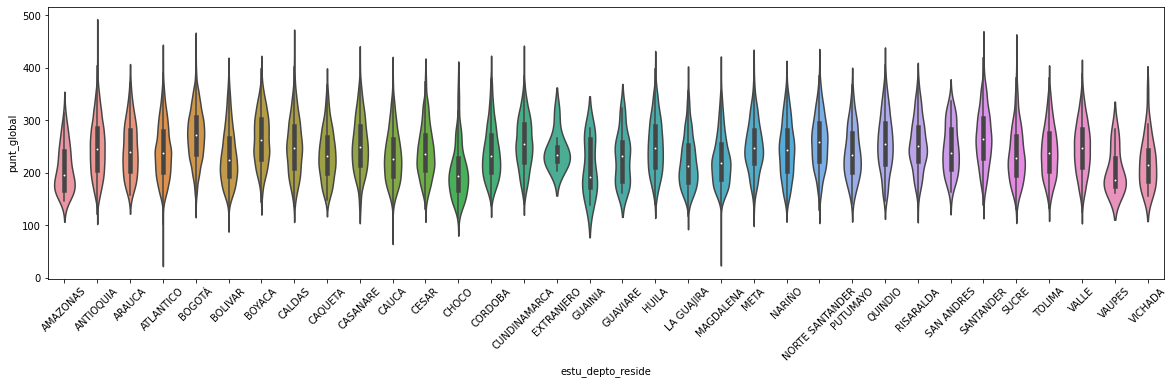

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.xticks(rotation = 45)
sns.violinplot(data = data, y = 'punt_global', x ='estu_depto_reside')

### **Correlations between scores by area**

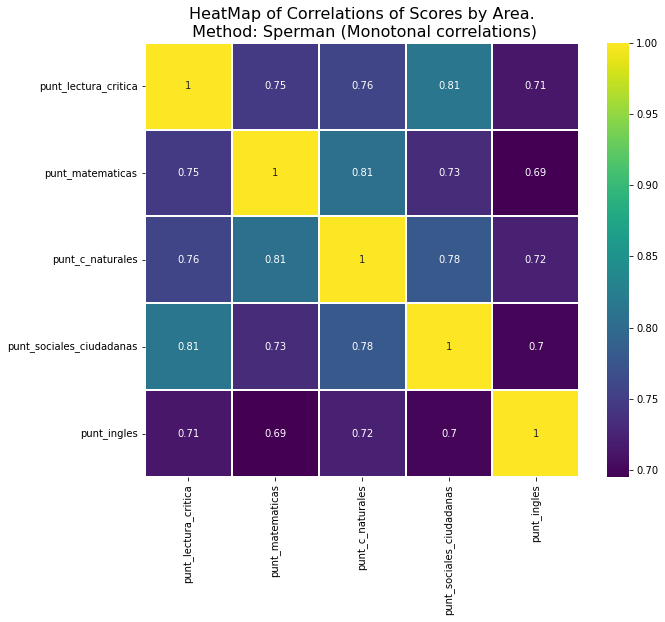

In [101]:
import seaborn as sns 

scores = data[['punt_lectura_critica', 'punt_matematicas', 'punt_c_naturales', 'punt_sociales_ciudadanas','punt_ingles']]
plt.figure(figsize = (10,8))
plt.title('HeatMap of Correlations of Scores by Area.\n Method: Sperman (Monotonal correlations)',fontsize = 16)
heat_scores1 = sns.heatmap(scores.corr(method = 'spearman' ), annot = True, square = True, linewidths = 1, cmap = 'viridis')

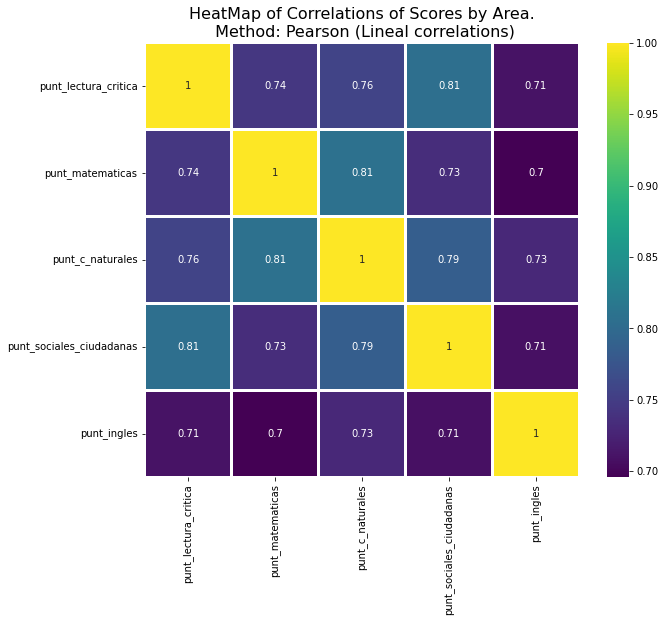

In [103]:
plt.figure(figsize = (10,8))
plt.title('HeatMap of Correlations of Scores by Area.\n Method: Pearson (Lineal correlations)',fontsize = 16)
heat_scores1 = sns.heatmap(scores.corr(method = 'pearson'), annot = True, square = True, linewidths = 1.5, cmap ='viridis')

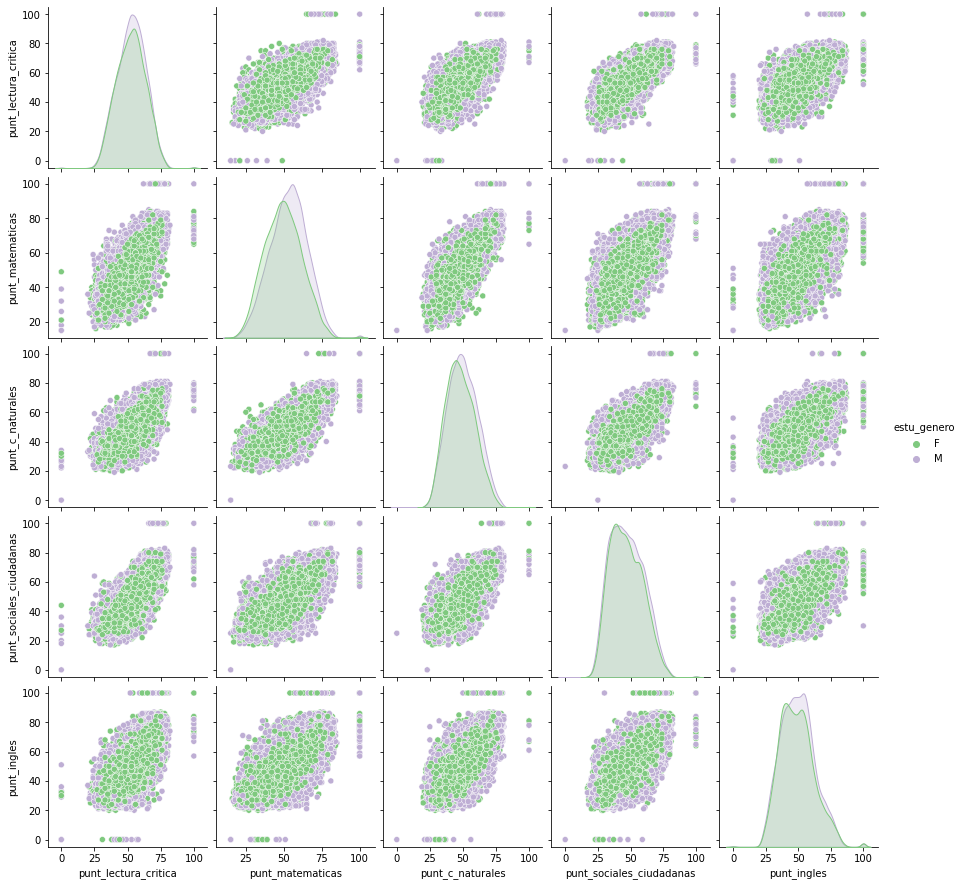

In [113]:
vars = list(scores.columns)
data_ = data[vars + ['estu_genero']]
sns.pairplot(data_,hue ='estu_genero',palette = 'Accent')

### **Boxplots Scores by Gender and Region**

da 
da 
da 
da 
da 


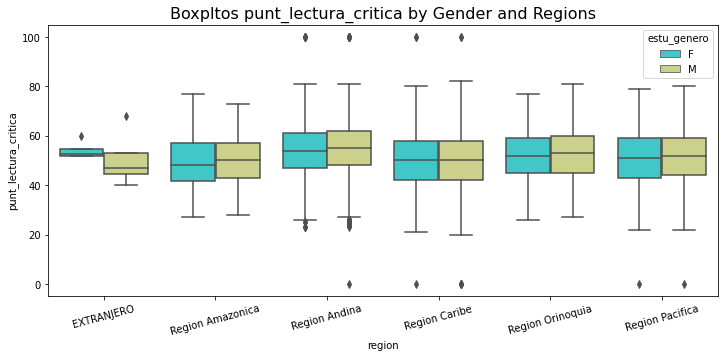

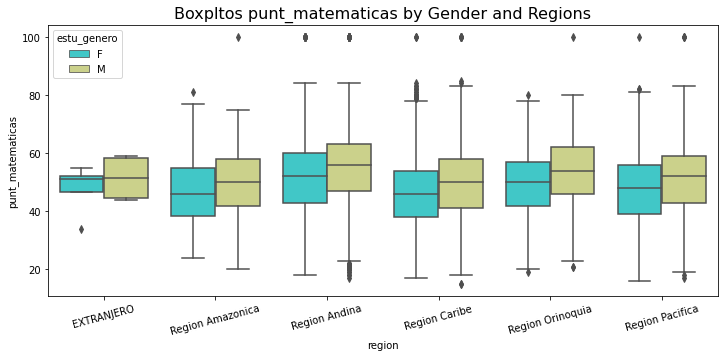

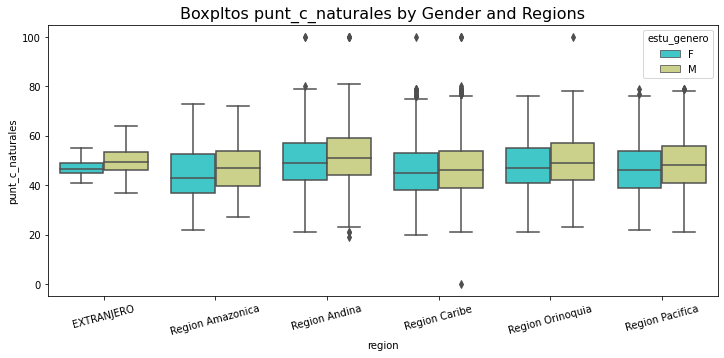

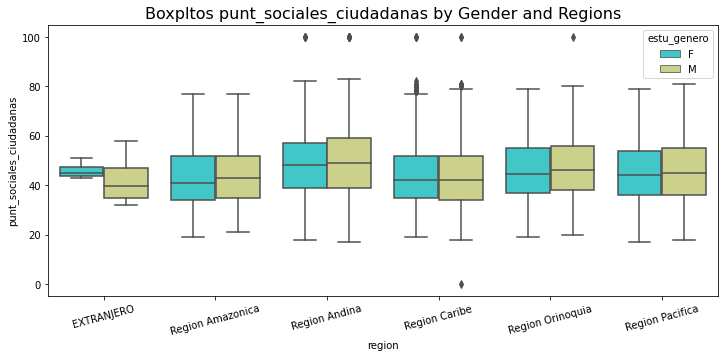

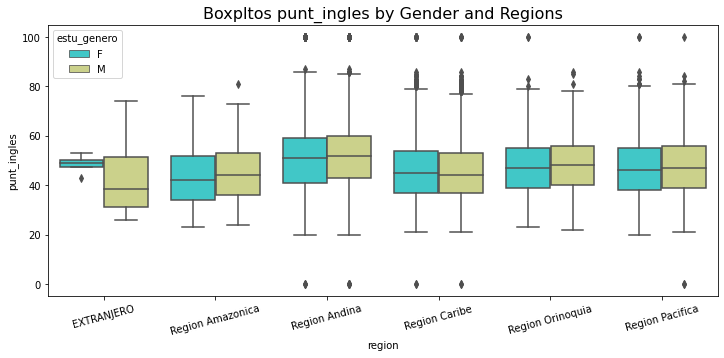

In [88]:
for i in scores.columns:
  plt.figure(figsize=(12,5))
  plt.xticks(rotation = 15)
  plt.title(f"Boxpltos {i} by Gender and Regions", fontsize = 16)
  box2 = sns.boxplot(x='region',y=i, data=data, hue='estu_genero', palette='rainbow')

### **Average scores by area, gender and region**

In [128]:
pivot_promedios = pd.pivot_table(index = 'region', columns = 'estu_genero',values = list(scores.columns), data = data,aggfunc='mean')

In [129]:
pivot_promedios

punt_c_naturales            punt_ingles             \
estu_genero                     F          M           F          M   
region                                                                
EXTRANJERO              47.250000  50.000000   48.500000  44.250000   
Region Amazonica        45.192440  46.789855   44.182131  44.539855   
Region Andina           49.402728  51.534228   51.028517  51.943070   
Region Caribe           45.777116  46.992263   46.259833  45.682592   
Region Orinoquia        47.844891  49.955590   47.899635  48.558959   
Region Pacifica         46.705993  48.512574   46.914110  47.898491   

                 punt_lectura_critica            punt_matematicas             \
estu_genero                         F          M                F          M   
region                                                                         
EXTRANJERO                  54.250000  50.500000        47.750000  51.500000   
Region Amazonica            49.494845  49.655797        46.714777  50.108696   
Region Andina               53.973061  54.592648        51.536970  55.000994   
Region Caribe               50.548868  49.875435        46.714144  49.723404   
Region Orinoquia            52.180657  52.465544        49.636861  53.635528   
Region Pacifica             50.873525  51.582076        47.946673  51.197074   

                 punt_sociales_ciudadanas             
estu_genero                             F          M  
region                                                
EXTRANJERO                      46.000000  42.250000  
Region Amazonica                43.477663  43.384058  
Region Andina                   48.438007  49.315052  
Region Caribe                   44.074096  43.408124  
Region Orinoquia                46.029197  47.133231  
Region Pacifica                 45.058990  45.789666

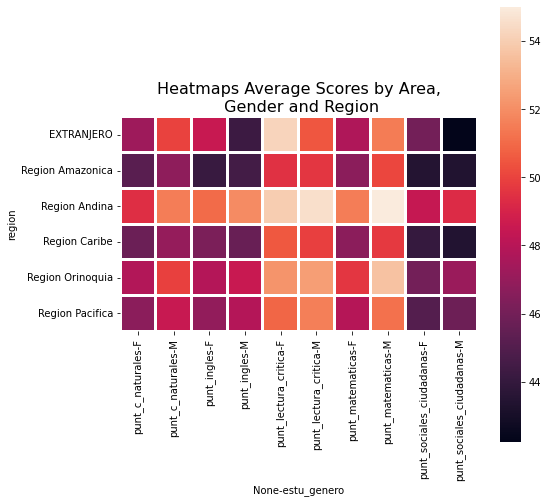

In [134]:
plt.figure(figsize = (8,8))
plt.title('Heatmaps Average Scores by Area,\n Gender and Region', fontsize = 16)
sns.heatmap(pivot_promedios, square = True, linewidths = 2)


The present analysis serves as a preliminary observation for the approach of some type of regression that allows estimating the overall score of a student in the exam, from the beginning certain variables were left out that can be useful when making the aforementioned estimate, However, we wanted to focus on how the global score and that of the different areas were distributed both in the total sample and restricted by different characteristics of the data.

In general, it is possible to comment on the fact that the Andean region is the one with the highest average in the different areas, however it should be taken into account that the percentage participation of this region is greater compared to the others.

On the other hand, there is also a tendency to the presence of higher medians and averages within the same regions than individuals of the male gender. Likewise, it is interesting to comment that when finding the correlations between the scores of the different areas, levels of high relationship are found.  so it would be interesting to analyze performance trends in specific areas by students with specific skills